**MACHINE LEARNING MINI PROJECT**

PID 23


1.  DEEPTI DABAL 
2.  RINA GHOLAP
3.  ATHARVA PANDHARIKAR
4.  HARSHADA SONAWANE 


 **Prediction of Campus Placement**

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#load the dataset
df=pd.read_csv("Placement_data_full_class.csv")
#see the 5 first data
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [ ]:
#set the sl_no as a row no
df.set_index('sl_no',inplace=True)
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [ ]:
#check datatype or null 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215 entries, 1 to 215
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 25.2+ KB


In [ ]:
#see some statics data
df.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [ ]:
#check number of rows and columns
print(df.shape[0]) #no of rows
print(df.shape[1]) #no of columns

215
14


In [ ]:
# check null values in df
df.isnull().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [ ]:
#fill salary null value with mode 
df["salary"]=df["salary"].fillna(df["salary"].mean())

In [ ]:
#check datatypes
df.dtypes

gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

**Handling with Catagorical Data**

In [ ]:
# we convert object type data into numerical datatype
    
df['gender']=df['gender'].astype('category')
df['status']=df['status'].astype('category')
df['workex']=df['workex'].astype('category')
df['hsc_b']=df['hsc_b'].astype('category')
df['ssc_b']=df['ssc_b'].astype('category')

In [ ]:
#check how many unique data in these dataframe

print(df['gender'].unique())
print(df['status'].unique())
print(df['workex'].unique())
print(df['hsc_b'].unique())
print(df['ssc_b'].unique())

['M', 'F']
Categories (2, object): ['F', 'M']
['Placed', 'Not Placed']
Categories (2, object): ['Not Placed', 'Placed']
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
['Others', 'Central']
Categories (2, object): ['Central', 'Others']
['Others', 'Central']
Categories (2, object): ['Central', 'Others']


In [ ]:
# Replace the value in 0,1 or quantitative parameters
df["gender"].replace(["F","M"],[0,1],inplace=True)
df["status"].replace(['Placed',"Not Placed"],[1,0],inplace=True)

df['workex'].replace(to_replace ="Yes", value =1,inplace=True) 
df['workex'].replace(to_replace ="No", value =0,inplace=True)

In [ ]:
df["gender"].dtype

dtype('int64')

In [ ]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,1,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,0,55.0,Mkt&HR,58.80,1,270000.000000
2,1,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,1,86.5,Mkt&Fin,66.28,1,200000.000000
3,1,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,0,75.0,Mkt&Fin,57.80,1,250000.000000
4,1,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,0,66.0,Mkt&HR,59.43,0,288655.405405
5,1,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,0,96.8,Mkt&Fin,55.50,1,425000.000000


In [ ]:
#create a new dataframe of only numerical values
numerical_df=df.select_dtypes(["float64","int64"])

**Visualizing the data**

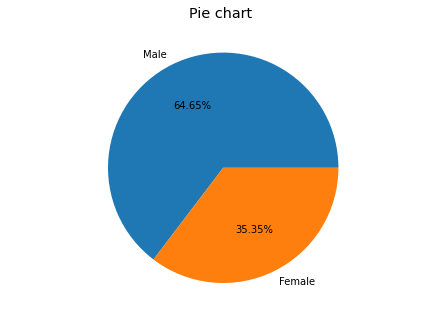

In [ ]:
# show the percentage of male or female
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
gender = ['Male','Female']
students = [139,76]
ax.pie(students, labels = gender,autopct='%1.2f%%',colors = ["#1f77b4", "#ff7f0e"])
plt.title('Pie chart ')
plt.show()

Number of not placed Student 67
Number of placed Student 0


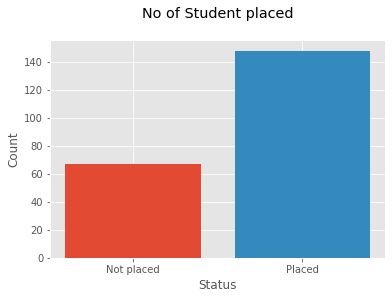

In [ ]:
#show the no. of student how placed or not placed.

print("Number of not placed Student "+ str(len(df[df["status"]==0])))
print("Number of placed Student "+ str(len(df[df["status"]=="Placed"])))

plt.bar([0],height=len(df[df["status"]==0]))
plt.bar([1],height=len(df[df["status"]==1]))

plt.xlabel("Status")
plt.ylabel("Count")

plt.xticks(np.arange(2), ('Not placed', 'Placed'))
plt.title("No of Student placed\n")
plt.show()

scc_p mean = 67.30339534883721
hsc_p mean = 66.33316279069768
mba_p mean = 62.278186046511635
degree_p mean = 66.37018604651163


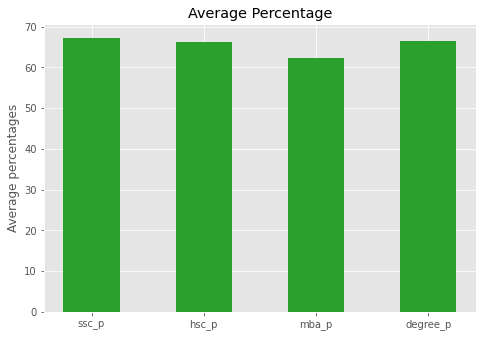

In [ ]:
#average percentage of all education qualification
values = [(numerical_df['ssc_p'].mean()),(numerical_df['hsc_p'].mean()),(numerical_df['mba_p'].mean()),(numerical_df['degree_p'].mean())]
print('scc_p mean = ' +str(numerical_df['ssc_p'].mean()))
print('hsc_p mean = ' +str(numerical_df['hsc_p'].mean()))
print('mba_p mean = ' +str(numerical_df['mba_p'].mean()))
print('degree_p mean = ' +str(numerical_df['degree_p'].mean()))
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
names = ['ssc_p','hsc_p','mba_p','degree_p']
ax.set_ylabel('Average percentages')
ax.set_title('Average Percentage')
ax.bar(names,values,width = 0.5,color=["#2ca02c"])
plt.show()

In [ ]:
#show the relation between diffrent qualification placement status usinng correlation.

print('ssc_p to placement ', round(numerical_df['status'].corr(numerical_df['ssc_p'])*100,1),'%')
print('hsc_p to placement ', round(numerical_df['status'].corr(numerical_df['hsc_p'])*100,1),'%')
print('mba_p to placement ', round(numerical_df['status'].corr(numerical_df['mba_p'])*100,1),'%')
print('degree_p to placement ', round(numerical_df['status'].corr(numerical_df['degree_p'])*100,1),'%')
print('etest_p to placement ', round(numerical_df['status'].corr(numerical_df['etest_p'])*100,1),'%')


ssc_p to placement  60.8 %
hsc_p to placement  49.1 %
mba_p to placement  7.7 %
degree_p to placement  48.0 %
etest_p to placement  12.8 %


In [ ]:
df_grade = df.groupby(['status']).mean()[['hsc_p', 'degree_p', 'mba_p']].reset_index()
df_grade.head()

,status,hsc_p,degree_p,mba_p
0,0,58.395522,61.134179,61.612836
1,1,69.926554,68.740541,62.579392


In [ ]:
#Student Grades and Campus Placement
import plotly
import plotly.graph_objs as go
from plotly.subplots import make_subplots
plotly.offline.init_notebook_mode(connected=True)

import matplotlib.pyplot as plt
%matplotlib inline

trace1 = go.Bar(
    x = ['High School', 'Bachelor', 'MBA'],
    y = df_grade[df_grade['status']==0].drop('status', axis=1).values[0],
    name = 'Not Placed'
)

trace2 = go.Bar(
    x = ['High School', 'Bachelor', 'MBA'],
    y = df_grade[df_grade['status']==1].drop('status', axis=1).values[0],
    name = 'Placed'
)

data = [trace1, trace2]

layout = go.Layout(
    yaxis = dict(title = 'Grade'),
    xaxis = dict(title = 'Stage'),
    title = 'Student Grades and Campus Placement')
fig = go.Figure(data=data, layout=layout)
fig.show()

In [ ]:
   def count_genderwise_status(gender=0,status=0):
    '''
    dtype(int,boolen) gender : male for 1, female for 0
    dtype(int,boolen) status : placed for 1, not place for 0
    return : return the total number of status(placed or not placed) with respect to gender
    
    Example :
     
          if gender is female and status is placed then
          gender=0 ,placed=1
          
          count_genderwise_status(0,1)
          
          here : O for Female
                 1 for placed
          
          return int type
          
   means : 48 female has placed.

   Example 2:
          
          count_genderwise_status(1,0)
          
          here : 1 for male
                 0 for not placed
          return total number of male person who has not placed. 
    '''   
    i=0
    for j in range(len(df)):
        j=j+1
        if df['gender'][j]==gender and df['status'][j]==status:
            i+=1

    if gender==0 and status==0:
        print("Total female who don't get placement is "+str(i))
    if gender==0 and status==1:
        print("Total female who get placement is "+str(i))
    if gender==1 and status==0:
        print("Total male who don't get placement is "+str(i))
    if gender==1 and status==1:
        print("Total male who get placement is "+str(i))
    

    return i

In [ ]:
not_placed_female=count_genderwise_status(0,0)
placed_female=count_genderwise_status(0,1)
not_placed_male=count_genderwise_status(1,0)
placed_male=count_genderwise_status(1,1)

In [ ]:
print("Not place female "+str(not_placed_female))
print("place female     "+str(placed_female))
print("Total female     "+str(len(df[df["gender"]==0])))
print("\n")
print("Not placed male  "+str(not_placed_male))
print("Placed male      "+str(placed_male))
print("Total male       "+str(len(df[df["gender"]==1])))
print("\n")
print("Total Not placed "+str(len(df[df["status"]==0])))
print("Total placed     "+str(len(df[df["status"]==1])))
print("\n")
print("Total student    "+str(len(df)))


Not place female 28
place female     48
Total female     76


Not placed male  39
Placed male      100
Total male       139


Total Not placed 67
Total placed     148


Total student    215


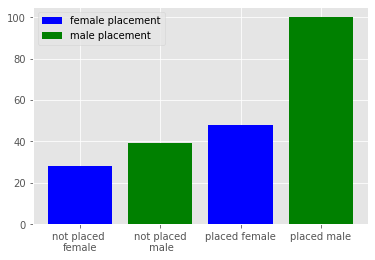

In [ ]:
plt.bar([0,2],height=[not_placed_female,placed_female],color='b',align='center')
plt.xticks(range(0,5),['not placed \nfemale','not placed\n male','placed female','placed male'])
plt.bar([1,3],height=[not_placed_male,placed_male],color='g',align='center')

plt.legend(['female placement', 'male placement'])
#To show the plot finally we have used plt.show().
plt.show()

In [ ]:
#calculate percentage
print((placed_female/len(df))*100)
print((placed_male/len(df))*100)
print(((not_placed_female+not_placed_male)/len(df))*100)

22.325581395348838
46.51162790697674
31.16279069767442


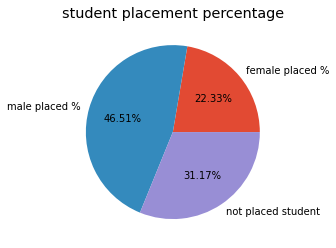

In [ ]:
#plot pie chart of placeement
plt.pie([22.33,46.51,31.17],
        labels=["female placed %","male placed %",'not placed student'],
        autopct='%1.2f%%')
plt.title('student placement percentage')
plt.show()

specialisation in Mkt&Fin 120
specialisation in Mkt&HR 95


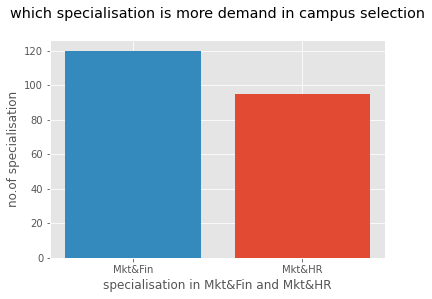

In [ ]:
# which specialisation is more demand in campus selection

plt.bar([1],height=len(df[df["specialisation"]=="Mkt&HR"]))
plt.bar([0],height=len(df[df["specialisation"]=="Mkt&Fin"]))
plt.xlabel("specialisation in Mkt&Fin and Mkt&HR")
plt.ylabel("no.of specialisation")

print("specialisation in Mkt&Fin "+ str(len(df[df["specialisation"]=="Mkt&Fin"])))
print("specialisation in Mkt&HR "+ str(len(df[df["specialisation"]=="Mkt&HR"])))
plt.xticks(np.arange(2), ('Mkt&Fin', 'Mkt&HR'))
plt.title("which specialisation is more demand in campus selection\n")
plt.show()

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(
    df[['ssc_p','hsc_p','degree_p','workex','etest_p','mba_p']],
    df.status,
    test_size=0.2)

In [ ]:
len(y_train)

161

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
# create a logistic regresssion model and fit it.
def lr_model(x_train,y_train,x_test,y_test):
    
    '''
    Input
      x_train :training featue
      x_test  :test featue
      y_train :training output data
      y_test  :testing  output data
      
      
    Output :
     accuracy_score       :
     classification_report:
    '''
    
    print("Using Logistic Regression Method")
    model=LogisticRegression()
    model.fit(x_train,y_train)
    prediction=model.predict(x_test)
    print('Accuracy {0:.2f}%'.format((accuracy_score(y_test,prediction)*100)))
    print(classification_report(y_test,prediction))

In [ ]:
# Fitting Random Forest Classification to the Training set
def rfc_model(x_train,y_train,x_test,y_test):
    
    '''
    Input
      x_train :training featue
      x_test  :test featue
      y_train :training output data
      y_test  :testing  output data
      
      
    Output :
     accuracy_score       :
     classification_report:
    '''
    
    print("using Random Forest Classification method")
    model=RandomForestClassifier(n_estimators =14, criterion = 'entropy', random_state = 41)
    model.fit(x_train,y_train)
    prediction=model.predict(x_test)
    print('Accuracy {0:.2f}%'.format((accuracy_score(y_test,prediction)*100)))
    print(classification_report(y_test,prediction))

In [ ]:
lr_model(x_train,y_train,x_test,y_test)

Using Logistic Regression Method
Accuracy 90.70%
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        10
           1       0.94      0.94      0.94        33

    accuracy                           0.91        43
   macro avg       0.87      0.87      0.87        43
weighted avg       0.91      0.91      0.91        43



In [ ]:
rfc_model(x_train,y_train,x_test,y_test)

using Random Forest Classification method
Accuracy 88.37%
              precision    recall  f1-score   support

           0       0.86      0.60      0.71        10
           1       0.89      0.97      0.93        33

    accuracy                           0.88        43
   macro avg       0.87      0.78      0.82        43
weighted avg       0.88      0.88      0.88        43

